In [ ]:
!nvidia-smi -L
%cd /content/drive/MyDrive/Colab Notebooks/BADS9000_IS/thai-DrQA

GPU 0: Tesla V100-SXM2-16GB (UUID: GPU-4806b2e5-038e-91c9-79df-da60d276caf1)
/content/drive/MyDrive/Colab Notebooks/BADS9000_IS/thai-DrQA


# Intall Package

In [ ]:
!pip install thai2transformers==0.1.1
!pip install torch==1.7.0
!pip install sentencepiece
!pip install transformers==4.11.2 #For load Tranformers Model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 19.0 MB/s 
     |████████████████████████████████| 1.1 MB 86.1 MB/s 
     |████████████████████████████████| 175 kB 75.7 MB/s 
     |████████████████████████████████| 11.5 MB 75.8 MB/s 
     |████████████████████████████████| 362 kB 88.3 MB/s 
     |████████████████████████████████| 8.7 MB 82.3 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 585 kB 79.0 MB/s 
     |████████████████████████████████| 473 kB 59.3 MB/s 
     |████████████████████████████████| 2.9 MB 54.9 MB/s 
     |████████████████████████████████| 87 kB 7.6 MB/s 
     |████████████████████████████████| 965 kB 59.2 MB/s 
     |████████████████████████████████| 880 kB 84.9 MB/s 
     |████████████████████████████████| 1.1 MB 81.6 MB/s 
     |████████████████████████████████| 101 kB 13.9 MB/s 
     |████████████████████████████

# Import package

In [ ]:
import torch
import numpy as np 
import pandas as pd
from transformers import AutoTokenizer, AutoModel # wangchanberta
from transformers import MT5EncoderModel, T5Tokenizer
import matplotlib.pyplot as plt

# Load Pre-Trained

WangChan BERTa

In [ ]:
#Load wangchanberta
token_wc = AutoTokenizer.from_pretrained('airesearch/wangchanberta-base-att-spm-uncased')
model_wc = AutoModel.from_pretrained('airesearch/wangchanberta-base-att-spm-uncased', max_position_embeddings=512)
print("max_position_embeddings",model_wc.config.max_position_embeddings)

Downloading:   0%|          | 0.00/282 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/546 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/883k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/404M [00:00<?, ?B/s]

Some weights of the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased were not used when initializing CamembertModel: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing CamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


max_position_embeddings 512


In [ ]:
tet_text = "วิทยาลัยสหเวชศาสตร์ มหาวิทยาลัยราชภัฏสวนสุนันทาวิทยาลัยสหเวชศาสตร์ มหาวิทยาลัยราชภัฏสวนสุนันทา วิทยาลัยสหเวชศาสตร์ มหาวิทยาลัยราชภัฏสวนสุนันทา"

In [ ]:
w_token = token_wc(tet_text, return_tensors="pt", padding=True).input_ids
w_output= model_wc(w_token).last_hidden_state
print(f"example of w_token : {w_token.shape}/{w_token[0][0:5]}...")
print(f"example of w_output : {w_output.shape}/{w_output[0][0][0:5]}")

example of w_token : torch.Size([1, 34])/tensor([    5,    10,  2696,  5543, 24166])...
example of w_output : torch.Size([1, 34, 768])/tensor([ 0.3899, -0.5921, -0.0403, -0.4603,  0.4287], grad_fn=<SliceBackward>)


In [ ]:
import torch.nn as nn
class wc_emb(nn.Module):
      def __init__(self):
          super(wc_emb, self).__init__()
          self.embeding = AutoModel.from_pretrained('airesearch/wangchanberta-base-att-spm-uncased')
          self.token = AutoTokenizer.from_pretrained('airesearch/wangchanberta-base-att-spm-uncased')
          for param in self.embeding.parameters():
              param.requires_grad = False
      def forward(self, x):
          return self.embeding(x).last_hidden_state

      def token_encode(self, texts):
          return self.token(texts, return_tensors="pt", padding=True).input_ids

      def token_decode(self, ids):
          return self.token.decode(ids)

model_wc = wc_emb()
w_token = model_wc.token_encode(tet_text)
wc_output= model_wc(w_token)
print(f"example of w_token : {w_token.shape}/{w_token[0][0:5]}...")
print(f"example of w_output : {w_output.shape}/{w_output[0][0][0:5]}")

Some weights of the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased were not used when initializing CamembertModel: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing CamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


example of w_token : torch.Size([1, 34])/tensor([    5,    10,  2696,  5543, 24166])...
example of w_output : torch.Size([1, 34, 768])/tensor([ 0.3899, -0.5921, -0.0403, -0.4603,  0.4287], grad_fn=<SliceBackward>)


Load MT5

In [ ]:
#Load Google mT5
model_mt5 = MT5EncoderModel.from_pretrained("google/mt5-base" )
token_mt5 = T5Tokenizer.from_pretrained("google/mt5-base" )

Downloading:   0%|          | 0.00/702 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.17G [00:00<?, ?B/s]

Some weights of the model checkpoint at google/mt5-base were not used when initializing MT5EncoderModel: ['decoder.block.8.layer.1.EncDecAttention.k.weight', 'decoder.block.0.layer.0.layer_norm.weight', 'decoder.block.3.layer.0.SelfAttention.k.weight', 'decoder.block.1.layer.1.layer_norm.weight', 'decoder.block.8.layer.2.layer_norm.weight', 'decoder.block.10.layer.0.layer_norm.weight', 'decoder.block.1.layer.2.DenseReluDense.wo.weight', 'decoder.block.4.layer.1.EncDecAttention.k.weight', 'decoder.final_layer_norm.weight', 'decoder.block.2.layer.0.SelfAttention.q.weight', 'decoder.block.11.layer.0.SelfAttention.v.weight', 'decoder.block.6.layer.0.SelfAttention.v.weight', 'decoder.block.7.layer.2.layer_norm.weight', 'decoder.block.1.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.11.layer.2.DenseReluDense.wo.weight', 'decoder.block.10.layer.1.EncDecAttention.o.weight', 'decoder.block.10.layer.2.layer_norm.weight', 'decoder.block.10.layer.0.SelfAttention.q.weight', 'decoder.block.9.la

Downloading:   0%|          | 0.00/4.11M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/376 [00:00<?, ?B/s]

In [ ]:
m_token = token_mt5(tet_text, return_tensors="pt", padding=True).input_ids
m_output= model_mt5(m_token).last_hidden_state
print(f"example of m_token : {m_token.shape}/{m_token[0][0:5]}...")
print(f"example of m_output : {m_output.shape}/{m_output[0][0][0:5]}...")

example of m_token : torch.Size([1, 45])/tensor([   259, 215983, 204405,  47534,  12682])...
example of m_output : torch.Size([1, 45, 768])/tensor([ 0.0169, -0.0005,  0.0113,  0.0031, -0.0142], grad_fn=<SliceBackward>)...


In [ ]:
class mt5_emb(nn.Module):
      def __init__(self):
          super(mt5_emb, self).__init__()
          self.embeding = MT5EncoderModel.from_pretrained("google/mt5-base" )
          self.token = T5Tokenizer.from_pretrained("google/mt5-base" )
          for param in self.embeding.parameters():
              param.requires_grad = False
      def forward(self, token):
          return self.embeding(token).last_hidden_state

      def token_encode(self, texts):
          return self.token(texts, return_tensors="pt", padding=True).input_ids

      def token_decode(self, ids):
          return self.token.decode(ids)

model_mt5 = mt5_emb()
m_token = model_mt5.token_encode(tet_text)
m_output= model_mt5(m_token)
print(f"example of m_token : {m_token.shape}/{m_token[0][0:5]}...")
print(f"example of m_output : {m_output.shape}/{m_output[0][0][0:5]}...")

Some weights of the model checkpoint at google/mt5-base were not used when initializing MT5EncoderModel: ['decoder.block.8.layer.1.EncDecAttention.k.weight', 'decoder.block.0.layer.0.layer_norm.weight', 'decoder.block.3.layer.0.SelfAttention.k.weight', 'decoder.block.1.layer.1.layer_norm.weight', 'decoder.block.8.layer.2.layer_norm.weight', 'decoder.block.10.layer.0.layer_norm.weight', 'decoder.block.1.layer.2.DenseReluDense.wo.weight', 'decoder.block.4.layer.1.EncDecAttention.k.weight', 'decoder.final_layer_norm.weight', 'decoder.block.2.layer.0.SelfAttention.q.weight', 'decoder.block.11.layer.0.SelfAttention.v.weight', 'decoder.block.6.layer.0.SelfAttention.v.weight', 'decoder.block.7.layer.2.layer_norm.weight', 'decoder.block.1.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.11.layer.2.DenseReluDense.wo.weight', 'decoder.block.10.layer.1.EncDecAttention.o.weight', 'decoder.block.10.layer.2.layer_norm.weight', 'decoder.block.10.layer.0.SelfAttention.q.weight', 'decoder.block.9.la

example of m_token : torch.Size([1, 45])/tensor([   259, 215983, 204405,  47534,  12682])...
example of m_output : torch.Size([1, 45, 768])/tensor([ 0.0169, -0.0005,  0.0113,  0.0031, -0.0142])...


# Python scrip

In [ ]:
import pickle, re
import collections
import numpy as np
from bs4 import BeautifulSoup #html
#For Working Process
class argumentParser(dict):
  def __init__(self, **kwargs):
    for k in kwargs.keys():
         self.__setattr__(k, kwargs[k])

def save_to_pickle(save_obj, path_file):
    with open(path_file, 'wb') as file:
        pickle.dump(save_obj, file)
    print(f"save to {path_file} success")

def load_pickle(path_file):
    with open(path_file, 'rb') as file:
        load_obj = pickle.load(file)
        print(f"load object from {path_file} success,that is {type(load_obj)}")
        return load_obj


#For Data Preparlation
def label_answer(context ,answer):
  try:
    start_idx = context.index(answer)
    re_val = [start_idx, start_idx+len(answer)]
  except:
    re_val = np.nan
  return re_val

def getanswer(context,label):
  sidx,eidx = label
  return context[sidx:eidx]

def max_ctx(obj):
  if obj.max_ctx_len ==-1:
    max_len = df_qa.context_length.max()
  else :
    max_len = obj.max_ctx_len
  return max_len

def reguEx(text_str):
  text_re = re.sub(r"[^\u0E00-\u0E7Fa-zA-Z'0-9]|^'|'$|''", ' ',text_str)
  text_re = re.sub(r' +', ' ',text_re)
  return text_re.translate(str.maketrans('๑๒๓๔๕๖๗๘๙๐','1234567890'))

def token_span(token):
      lst_span = []
      start_span = 0
      for w in token:
         lst_span.append( (start_span, start_span+len(w)) )
         start_span += len(w)
      return lst_span

# Load Data

In [ ]:
cfg_data = argumentParser(**{'data_file': "ThaiQA15K_0_origi.pkl", })

In [ ]:
#Load Original File
df_qa = load_pickle(f"./ThaiWikiQA/{cfg_data.data_file}")
df_qa = df_qa[~df_qa.html_answer.isin(['ไม่ใช่','ใช่'])].reset_index(drop=True) #Exclude Yes/No Answer

display(df_qa.head(2))
print(f"shape of df_qa {df_qa.shape}")
print(f"Number of article {len(df_qa.article_id.unique())} ,Number of question {len(df_qa.question.unique())}")

load object from ./ThaiWikiQA/ThaiQA15K_0_origi.pkl success,that is <class 'pandas.core.frame.DataFrame'>


,article_id,id,html_context,question,html_label,html_answer
0,115035,1,"<doc id=""115035"" url=""https://th.wikipedia.org...",สุนัขตัวแรกรับบทเป็นเบนจี้ในภาพยนตร์เรื่อง Ben...,"[529, 538]",ฮิกกิ้นส์
1,376583,2,"<doc id=""376583"" url=""https://th.wikipedia.org...",ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,"[139, 144]",เมชตา


shape of df_qa (15000, 6)
Number of article 8700 ,Number of question 14977


In [ ]:
#Cleansing Data
df_qa['id'] = df_qa.id.apply(lambda x : str(x).zfill(7))
df_qa['context'] = df_qa['html_context'].apply(lambda x: reguEx(BeautifulSoup(x, 'lxml').text))
df_qa['question'] = df_qa['question'].apply(lambda x: reguEx(x))
df_qa['answer'] = df_qa['html_answer'].apply(lambda x: reguEx(x))
df_qa['label']  = df_qa.apply(lambda x: label_answer(x['context'],x['answer']) , axis=1)
df_qa['context_length'] = df_qa.context.apply(lambda x : len(x))
df_qa['question_length'] = df_qa.question.apply(lambda x : len(x))
df_qa['answer_length'] = df_qa.answer.apply(lambda x : len(x))
df_na = df_qa[df_qa.label.isna()]
df_qa = df_qa[~df_qa.label.isna()][["article_id","id","context","question","answer","label"]]
display(df_qa.sample(2))
print(f"shape of df_qa {df_qa.shape}")

,article_id,id,context,question,answer,label
2435,229468,0002436,สตรีทบอลสะท้านฟ้า สตรีทบอลสะท้านฟ้า เป็นการ์ตู...,ใครคือเจ้าของผลงานการ์ตูนไทยเรื่อง สตรีทบอลสะท...,จักรพันธ์ ห้วยเพชร,"[64, 82]"
6550,685421,0006551,เกมพันหน้า เกมพันหน้า เป็นรายการเกมโชว์ที่เปลี...,เกมพันหน้า ซึ่งเป็นรายการเกมโชว์ลำดับที่ 3 ของ...,2544,"[170, 174]"


shape of df_qa (14997, 6)


In [ ]:
display(df_na)

,article_id,id,html_context,question,html_label,html_answer,context,answer,label,context_length,question_length,answer_length
4407,852258,0004408,"<doc id=""852258"" url=""https://th.wikipedia.org...",วิทยาลัยสหเวชศาสตร์ แรกเริ่มก่อตั้งตามมติสภามห...,"[610, 642]",วันที่ 11&nbsp;พฤษภาคม พ.ศ. 2555,วิทยาลัยสหเวชศาสตร์ มหาวิทยาลัยราชภัฏสวนสุนันท...,วันที่ 11 nbsp พฤษภาคม พ ศ 2555,NaN,1050,102,31
10813,314074,0010814,"<doc id=""314074"" url=""https://th.wikipedia.org...",อุณหภูมิปกติของร่างกายคือเท่าใด,"[193, 210]",36.5–37.5&nbsp;°C,ไข้ ไข้ หรือ อาการตัวร้อน เป็นอาการแสดงทางการแ...,36 5 37 5 nbsp C,NaN,13369,31,16
10814,314074,0010815,"<doc id=""314074"" url=""https://th.wikipedia.org...",กรณีวัดไข้ที่รักแร้หรือในรูหู จะต้องมีอุณหภูมิ...,"[1470, 1482]",37.2&nbsp;°C,ไข้ ไข้ หรือ อาการตัวร้อน เป็นอาการแสดงทางการแ...,37 2 nbsp C,NaN,13369,77,11


In [ ]:
#Check map new answer
lst_notmatch  = df_qa.apply(lambda x: getanswer(x['context'],x['label']) , axis=1) == df_qa['answer']
print(f" Correct Answer : {sum(lst_notmatch):,.0f}/{df_qa.shape[0]:,.0f}")

 Correct Answer : 14,997/14,997


# Tokenize

In [ ]:
def token_span(token):
      lst_span = []
      start_span = 0
      for w in token:
         lst_span.append( (start_span, start_span+len(w)) )
         start_span += len(w)
      return lst_span

def token(tokenTool, id, ctx_val, qtn_val, answer, exclude_id=None):
   ctx_ids = tokenTool(ctx_val, return_tensors="pt", padding=True).input_ids.tolist()[0]
   ctx_ids = [id for id in ctx_ids if id not in exclude_id ]
   ctx_token = [ tokenTool.decode(i) for i in ctx_ids ]
   ctx_decode = "".join(ctx_token)
   ctx_span =  token_span(ctx_token)
   ctx_tags = ["NCMN"]*len(ctx_token)
   ctx_ents = [""]*len(ctx_token)
   
 
   qtn_ids = tokenTool(qtn_val, return_tensors="pt", padding=True).input_ids.tolist()[0]
   qtn_ids = [id for id in qtn_ids if id not in exclude_id ]
   qtn_token = [ tokenTool.decode(i) for i in qtn_ids ]
   qtn_decode = "".join(qtn_token)
   answer_val = re.sub(r"\s+\Z","",answer)
   starts, ends = zip(*ctx_span)
 
   try :
     start_idx = ctx_decode.index(answer_val)
     answer_label = (start_idx, start_idx+len(answer_val))
     answer_spand = (int(starts.index(answer_label[0])), int(ends.index(answer_label[1])))
     answer_token = " ".join(ctx_token[answer_spand[0]:answer_spand[1]+1])
   except :
     answer_token = None
     answer_label = None
     answer_spand = (None, None)
   
   answer_dev = [answer.strip(), answer_val.strip(), answer_token]
   match_origin  = [w in qtn_token for w in ctx_token]
   match_lower  = [w in qtn_token for w in ctx_token]
   match_lemma = [w in qtn_token for w in ctx_token]
   counter_ = collections.Counter(ctx_token)
   total = len(ctx_token)
   ctx_tf = [counter_[w] / total for w in ctx_token]
   ctx_features = list(zip(match_origin, match_lower, match_lemma, ctx_tf))
 
   return pd.Series([id, ctx_token, ctx_features, ctx_tags, ctx_ents, qtn_token, ctx_decode, ctx_span, 
                     answer_spand[0], answer_spand[1], answer_dev,
                     ctx_ids, qtn_ids])
#Example
data_idx = 9
mt5_exclude = (0,1,259)
wc_exclude =  (0, 2, 3, 4, 5, 6, 7, 8, 10) #0 : <s>NOTUSED 1 : <pad> 2 : </s>NOTUSED 3 : <unk> 4 : <unk> 5 : <s> 6 : </s> 7 : <mask> 8 : <_> 10: ' '

test_mt5 = token(token_mt5, df_qa['id'][data_idx], df_qa['context'][data_idx], df_qa['question'][data_idx], df_qa['answer'][data_idx], mt5_exclude)

test_wc = token(token_wc, df_qa['id'][data_idx], df_qa['context'][data_idx], df_qa['question'][data_idx], df_qa['answer'][data_idx], wc_exclude)
print(test_mt5)

0                                               0000010
1     [รายชื่อ, ภาพยนตร์, ของ, พิ, ก, ซา, ร์, พ, ิก,...
2     [(False, False, False, 0.009174311926605505), ...
3     [NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCM...
4     [, , , , , , , , , , , , , , , , , , , , , , ,...
5     [พ, ิก, ซา, ร์, สต, ูด, ิโอ, สร้าง, คอมพิวเตอร...
6     รายชื่อภาพยนตร์ของพิกซาร์พิกซาร์เป็นสตูดิโอสร้...
7     [(0, 7), (7, 15), (15, 18), (18, 20), (20, 21)...
8                                                  None
9                                                  None
10    [บริษัทเดอะวอลต์ดิสนีย์, บริษัทเดอะวอลต์ดิสนีย...
11    [144132, 120287, 1881, 53727, 5405, 54307, 309...
12    [16912, 124213, 54307, 30990, 92825, 200364, 1...
dtype: object


In [ ]:
df_qa.head(3)[['id', 'context', 'question', 'answer']].apply(lambda x: token(token_wc,*x,exclude_id=wc_exclude) ,axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0000001,"[เบน, จี้, เบน, จี้, เป็นชื่อ, ตัวละคร, หมา, พ...","[(True, True, True, 0.02586206896551724), (Tru...","[NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCM...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[สุนัข, ตัวแรก, รับบทเป็น, เบน, จี้, ในภาพยนตร...",เบนจี้เบนจี้เป็นชื่อตัวละครหมาพันทางแสนรู้ที่ป...,"[(0, 3), (3, 6), (6, 9), (9, 12), (12, 20), (2...",88,91,"[ฮิกกิ้นส์, ฮิกกิ้นส์, ฮิ กก ิ้น ส์]","[3510, 2652, 3510, 2652, 9943, 2299, 1022, 120...","[2549, 17974, 16710, 3510, 2652, 10884, 79, 20..."
1,0000002,"[ลู, น, า, 1, ลู, น, า, 1, อี, 1, ซีรีส์, ซึ่ง...","[(True, True, True, 0.028735632183908046), (Tr...","[NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCM...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[ลู, น, า, 1, เป็น, ยานอวกาศ, ลํา, แรก, ในโครง...",ลูนา1ลูนา1อี1ซีรีส์ซึ่งในขณะนั้นรู้จักกันในชื่...,"[(0, 2), (2, 3), (3, 4), (4, 5), (5, 7), (7, 8...",15,18,"[เมชตา, เมชตา, เม ช ต า]","[1898, 42, 9, 59, 1898, 42, 9, 59, 6850, 59, 4...","[1898, 42, 9, 59, 17, 23577, 1365, 574, 6230, ..."
2,0000003,"[ลู, น, า, 1, ลู, น, า, 1, อี, 1, ซีรีส์, ซึ่ง...","[(True, True, True, 0.028735632183908046), (Tr...","[NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCM...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[ลู, น, า, 1, เป็น, ยานอวกาศ, ลํา, แรก, ในโครง...",ลูนา1ลูนา1อี1ซีรีส์ซึ่งในขณะนั้นรู้จักกันในชื่...,"[(0, 2), (2, 3), (3, 4), (4, 5), (5, 7), (7, 8...",107,108,"[ลมสุริยะ, ลมสุริยะ, ลม สุริยะ]","[1898, 42, 9, 59, 1898, 42, 9, 59, 6850, 59, 4...","[1898, 42, 9, 59, 17, 23577, 1365, 574, 6230, ..."


In [ ]:
%%time
mt5_qa = df_qa[['id', 'context', 'question', 'answer']].apply(lambda x: token(token_mt5,*x,exclude_id=mt5_exclude) ,axis=1)
print(f"answer label or spand is nan : {sum(mt5_qa[8].isna())}/{len(mt5_qa)} ({mt5_qa[8].isna().mean():0.2f})")
display(mt5_qa.head(2))

answer label or spand is nan : 4982/14997 (0.33)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0000001,"[เบน, จี้, เบน, จี้, เป็น, ชื่อ, ตัวละคร, หมา,...","[(True, True, True, 0.023809523809523808), (Tr...","[NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCM...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[สุนัข, ตัว, แรก, รับ, บท, เป็น, เบน, จี้, ใน,...",เบนจี้เบนจี้เป็นชื่อตัวละครหมาพันทางแสนรู้ที่ป...,"[(0, 3), (3, 6), (6, 9), (9, 12), (12, 16), (1...",111.0,114.0,"[ฮิกกิ้นส์, ฮิกกิ้นส์, ฮิ กก ิ้น ส์]","[196929, 231695, 196929, 231695, 21191, 38389,...","[156392, 8007, 43427, 15334, 56328, 3682, 1969..."
1,0000002,"[ลู, นา, 1, ลู, นา, 1, อี, 1, ซี, รี, ส์, ซึ่ง...","[(True, True, True, 0.023696682464454975), (Tr...","[NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCM...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[ลู, นา, 1, เป็น, ยาน, อว, กาศ, ลํา, แรก, ใน, ...",ลูนา1ลูนา1อี1ซีรีส์ซึ่งในขณะนั้นรู้จักกันในชื่...,"[(0, 2), (2, 4), (4, 5), (5, 7), (7, 9), (9, 1...",19.0,21.0,"[เมชตา, เมชตา, เม ช ตา]","[84306, 20475, 333, 84306, 20475, 333, 63098, ...","[84306, 20475, 333, 21191, 192493, 176354, 219..."


CPU times: user 10min 14s, sys: 7.97 s, total: 10min 22s
Wall time: 10min 19s


In [ ]:
for i in [2,3,4,7,11]:
  print(f"col 1-{i} : {mt5_qa.apply(lambda x:  len(x[1]) == len(x[i]) ,axis=1).sum()}/{len(mt5_qa)}")

col 1-2 : 14997/14997
col 1-3 : 14997/14997
col 1-4 : 14997/14997
col 1-7 : 14997/14997
col 1-11 : 14997/14997


In [ ]:
%%time
wc_qa = df_qa[['id', 'context', 'question', 'answer']].apply(lambda x: token(token_wc,*x,exclude_id=wc_exclude) ,axis=1)
print(f"answer label or spand is nan : {sum(wc_qa[8].isna())}/{len(wc_qa)} ({wc_qa[8].isna().mean():0.2f})")
display(wc_qa.head(2))

answer label or spand is nan : 5659/14997 (0.38)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0000001,"[เบน, จี้, เบน, จี้, เป็นชื่อ, ตัวละคร, หมา, พ...","[(True, True, True, 0.02586206896551724), (Tru...","[NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCM...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[สุนัข, ตัวแรก, รับบทเป็น, เบน, จี้, ในภาพยนตร...",เบนจี้เบนจี้เป็นชื่อตัวละครหมาพันทางแสนรู้ที่ป...,"[(0, 3), (3, 6), (6, 9), (9, 12), (12, 20), (2...",88.0,91.0,"[ฮิกกิ้นส์, ฮิกกิ้นส์, ฮิ กก ิ้น ส์]","[3510, 2652, 3510, 2652, 9943, 2299, 1022, 120...","[2549, 17974, 16710, 3510, 2652, 10884, 79, 20..."
1,0000002,"[ลู, น, า, 1, ลู, น, า, 1, อี, 1, ซีรีส์, ซึ่ง...","[(True, True, True, 0.028735632183908046), (Tr...","[NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCM...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[ลู, น, า, 1, เป็น, ยานอวกาศ, ลํา, แรก, ในโครง...",ลูนา1ลูนา1อี1ซีรีส์ซึ่งในขณะนั้นรู้จักกันในชื่...,"[(0, 2), (2, 3), (3, 4), (4, 5), (5, 7), (7, 8...",15.0,18.0,"[เมชตา, เมชตา, เม ช ต า]","[1898, 42, 9, 59, 1898, 42, 9, 59, 6850, 59, 4...","[1898, 42, 9, 59, 17, 23577, 1365, 574, 6230, ..."


CPU times: user 4min 3s, sys: 5.89 s, total: 4min 9s
Wall time: 4min 8s


In [ ]:
for i in [2,3,4,7,11]:
  print(f"col 1-{i} : {wc_qa.apply(lambda x:  len(x[1]) == len(x[i]) ,axis=1).sum()}/{len(mt5_qa)}")

col 1-2 : 14997/14997
col 1-3 : 14997/14997
col 1-4 : 14997/14997
col 1-7 : 14997/14997
col 1-11 : 14997/14997


In [ ]:
mt5_non_na = mt5_qa[0][~mt5_qa[8].isna()]
wc_non_na = wc_qa[0][~wc_qa[8].isna()]
all_non_na = list(set(mt5_non_na) & set(wc_non_na))
print(f"id that token answer is same : {len(all_non_na)}")

id that token answer is same : 9289


# Create corpus and Hash data

In [ ]:
def create_id_corpus(df):
    assert len(df.columns) ==13, """df should have 13 columns : 
    00-id,  01-ctx_token, 02-ctx_features, 03-ctx_tags, 04-ctx_ents, 
    05-qtn_token, 06-ctx_decode, 07-ctx_span, 08-answer_start, 09-answer_end, 10-answer_lst, 11-ctx_ids, 12-qtn_ids"""
    #Total token in data
    ctx_id  = np.hstack(df[11].tolist()).reshape(-1)
    qtn_id  = np.hstack(df[12].tolist()).reshape(-1)
    all_id  = np.concatenate((ctx_id, qtn_id), axis=0)
    all_tag = np.hstack(df[3].tolist()).reshape(-1)
    all_ent = np.hstack(df[4].tolist()).reshape(-1)
    print(f"Context token : {len(ctx_id)}, Question token : {len(qtn_id)}, All Token : {len(all_id)}")

    #Vocab in data
    counter_vocab = collections.Counter(w for w in all_id) # word : count in corpus
    vocab_id = sorted([id for id in counter_vocab], key=counter_vocab.get, reverse=True) #Get word and sort by counter if id not in (0,1,2)

    counter_tag = collections.Counter(w for w in all_tag)
    tag_id = sorted(counter_tag, key=counter_tag.get, reverse=True)

    counter_ent = collections.Counter(w for w in all_ent)
    ent_id = sorted(counter_ent, key=counter_ent.get, reverse=True)
    print(f"Vocab : {len(vocab_id)}, POS : {len(tag_id)}, ENT : {len(ent_id)}")

    return vocab_id, tag_id, ent_id

In [ ]:
%%time
mt5_vocab, mt5_pos, mt5_ent = create_id_corpus(mt5_qa)
for i in range(10):
    print(f"mt5 top {i+1} id-{mt5_vocab[i]} : {token_mt5.decode(int(mt5_vocab[i]))}")

Context token : 13843161, Question token : 279463, All Token : 14122624
Vocab : 36110, POS : 1, ENT : 1
mt5 top 1 id-1881 : ของ
mt5 top 2 id-17958 : ศ
mt5 top 3 id-1549 : ที่
mt5 top 4 id-3324 : และ
mt5 top 5 id-2361 : ใน
mt5 top 6 id-3945 : ม
mt5 top 7 id-3682 : เป็น
mt5 top 8 id-2091 : และ
mt5 top 9 id-4388 : น
mt5 top 10 id-5405 : ก
CPU times: user 16.8 s, sys: 230 ms, total: 17 s
Wall time: 16.9 s


In [ ]:
%%time
wc_vocab, wc_pos, wc_ent = create_id_corpus(wc_qa)
for i in range(10):
    print(f"wc top {i+1} id-{wc_vocab[i]} : {token_wc.decode(int(wc_vocab[i]))}")

Context token : 10635252, Question token : 206951, All Token : 10842203
Vocab : 23205, POS : 1, ENT : 1
wc top 1 id-9 : า
wc top 2 id-12 : ที่
wc top 3 id-89 : ศ
wc top 4 id-222 : และ
wc top 5 id-17 : เป็น
wc top 6 id-16 : ของ
wc top 7 id-43 : พ
wc top 8 id-13 : และ
wc top 9 id-20 : ใน
wc top 10 id-15 : ได้
CPU times: user 13 s, sys: 104 ms, total: 13.1 s
Wall time: 13 s


In [ ]:
def addHashID2DF(df, tokenTool, vocab, pos, tag):
    cur_col = len(df.columns)
    w2id = { tokenTool.decode(int(v)):i for i,v in enumerate(vocab)}
    tag2id = {w: i for i, w in enumerate(pos)}
    ent2id = {w: i for i, w in enumerate(tag)}
    vocab_size = len(vocab)
    df[cur_col+1] = df[3].apply(lambda x : [tag2id[t] for t in x])
    df[cur_col+2] = df[4].apply(lambda x : [ent2id[t] for t in x])
    return df, w2id, tag2id, ent2id

In [ ]:
%%time
wc_qa2, wc_vocab2id, wc_tag2id, wc_ent2id = addHashID2DF(wc_qa, tokenTool=token_wc, vocab=wc_vocab, pos=wc_pos, tag=mt5_ent)
wc_qa.head(2)

CPU times: user 1.81 s, sys: 3.92 ms, total: 1.81 s
Wall time: 1.81 s


In [ ]:
%%time
mt5_qa, mt5_vocab2id, mt5_tag2id, mt5_ent2id = addHashID2DF(mt5_qa.copy(), tokenTool=token_wc, vocab=wc_vocab, pos=wc_pos, tag=wc_ent)
mt5_qa.head(2)

CPU times: user 4.78 s, sys: 22.1 ms, total: 4.81 s
Wall time: 4.77 s


# meta data. vocab pos tag and embbeding

In [ ]:
def createEmbed(vocab, embedModel, embedSize):
    vocab_size = len(vocab)
    embeddings = np.zeros((vocab_size, embedSize))
    embed_counts = np.zeros(vocab_size)
    for i,vid in enumerate(vocab):
        elems = embedModel(torch.tensor([[vid]]))[0].tolist()[0][0]
        embed_counts[i] += 1
        embeddings[i] += [v for v in elems]
    embeddings /= embed_counts.reshape((-1, 1))
    print(f"Embedding matrix. embeddings.shape : {embeddings.shape} ")
    return embeddings

In [ ]:
%%time
mt5_embedding = createEmbed(mt5_vocab, model_mt5, 768)

Embedding matrix. embeddings.shape : (36110, 768) 
CPU times: user 53min 45s, sys: 9.88 s, total: 53min 55s
Wall time: 13min 28s


In [ ]:
%%time
wc_embedding = createEmbed(wc_vocab, model_wc, 768)

Embedding matrix. embeddings.shape : (23205, 768) 
CPU times: user 32min 9s, sys: 5.77 s, total: 32min 15s
Wall time: 8min 3s


In [ ]:
mt5_meta = {
    'baseModel' : 'mt5',
    'vocab': mt5_vocab,
    'vocab_tag': mt5_pos,
    'vocab_ent': mt5_ent,
    'embedding': mt5_embedding.tolist(),
    'wv_cased': True
}
save_to_pickle(mt5_qa , f"./ThaiWikiQA/mt5_1_data.pkl")
save_to_pickle(mt5_meta , f"./ThaiWikiQA/mt5_1_meta.pkl")

save to ./ThaiWikiQA/mt5_1_data.pkl success
save to ./ThaiWikiQA/mt5_1_meta.pkl success


In [ ]:
wc_meta = {
    'baseModel' : 'wangchan',
    'vocab': wc_vocab,
    'vocab_tag': wc_pos,
    'vocab_ent': wc_ent,
    'embedding': wc_embedding.tolist(),
    'wv_cased': True
}
save_to_pickle(wc_qa , f"./ThaiWikiQA/wangchan_1_data.pkl")
save_to_pickle(wc_meta , f"./ThaiWikiQA/wangchan_1_meta.pkl")

save to ./ThaiWikiQA/wangchan_1_data.pkl success
save to ./ThaiWikiQA/wangchan_1_meta.pkl success


# Split Valid data to Train Test Data 
(Train--> Cap ctx length --> Save, Test ---> Save) 

In [ ]:
#Load Data
mt5_meta = load_pickle( f"./ThaiWikiQA/mt5_1_meta.pkl")
mt5_qa = load_pickle( f"./ThaiWikiQA/mt5_1_data.pkl")
wc_meta = load_pickle( f"./ThaiWikiQA/wangchan_1_meta.pkl")
wc_qa = load_pickle( f"./ThaiWikiQA/wangchan_1_data.pkl")

load object from ./ThaiWikiQA/mt5_1_meta.pkl success,that is <class 'dict'>
load object from ./ThaiWikiQA/mt5_1_data.pkl success,that is <class 'pandas.core.frame.DataFrame'>
load object from ./ThaiWikiQA/wangchan_1_meta.pkl success,that is <class 'dict'>
load object from ./ThaiWikiQA/wangchan_1_data.pkl success,that is <class 'pandas.core.frame.DataFrame'>


In [ ]:
#Fixed data
mt5_qa[10] = mt5_qa[10].apply(lambda x: [x[0].strip(), x[1].strip(), x[2]])
wc_qa[10] = wc_qa[10].apply(lambda x: [x[0].strip(), x[1].strip(), x[2]])

In [ ]:
print( f" shape of mt5_qa : {mt5_qa.shape}")
print( f" shape of wc_qa : {wc_qa.shape}")
mt5_non_na = mt5_qa[0][~mt5_qa[8].isna()].tolist()
wc_non_na = wc_qa[0][~wc_qa[8].isna()].tolist()
all_non_na = list(set(mt5_non_na) & set(wc_non_na))
print(f"Valid question of mt5 : {len(mt5_non_na)}")
print(f"Valid question of wc : {len(wc_non_na)}")
print(f"id that token answer is same : {len(set(all_non_na))}")

 shape of mt5_qa : (14997, 15)
 shape of wc_qa : (14997, 15)
Valid question of mt5 : 10015
Valid question of wc : 9338
id that token answer is same : 9289


In [ ]:
#Random question id to  train test
total_valid = len(all_non_na)
train_size = int(total_valid *0.9)
test_size = total_valid - train_size
print(f"Train size : {train_size} Test size : {test_size}")

Train size : 8360 Test size : 929


In [ ]:
np.random.seed(123)
train_id = list(np.random.choice(all_non_na, train_size ,replace=False))
test_id = [ test for test in all_non_na if test not in train_id]
print(f"size of train_id:{len(train_id)} size of test_id:{len(test_id)}")

size of train_id:8360 size of test_id:929


In [ ]:
mt5_qa[~mt5_qa[0].isin(all_non_na)].sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15
7237,0007238,"[โรงพยาบาล, มหา, ราช, นครราชสีมา, โรงพยาบาล, ม...","[(True, True, True, 0.047619047619047616), (Tr...","[NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCM...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[โรงพยาบาล, มหา, ราช, นครราชสีมา, จังหวัด, นคร...",โรงพยาบาลมหาราชนครราชสีมาโรงพยาบาลมหาราชนครนคร...,"[(0, 9), (9, 12), (12, 15), (15, 25), (25, 34)...",NaN,NaN,"[พ ศ 2452, พ ศ 2452, None]","[118349, 59270, 47815, 232251, 118349, 59270, ...","[118349, 59270, 47815, 232251, 97550, 232251, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
13320,0013321,"[ใบ, สําคัญ, แสดง, สิทธิ, อนุ, พันธ์, ใบ, สําค...","[(False, False, False, 0.03759398496240601), (...","[NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCM...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[ตรา, สาร, ชนิด, ใด, ออก, โดย, สถาบัน, การเงิน...",ใบสําคัญแสดงสิทธิอนุพันธ์ใบสําคัญแสดงสิทธิอนุพ...,"[(0, 2), (2, 8), (8, 12), (12, 17), (17, 20), ...",NaN,NaN,"[ใบสำคัญแสดงสิทธิอนุพันธ์, ใบสำคัญแสดงสิทธิอนุ...","[42634, 64877, 44158, 111173, 136909, 198732, ...","[104364, 47282, 68533, 44954, 23045, 14785, 11...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
13836,0013837,"[สะพาน, แห่ง, ซาน, ห, ลุย, ส์, เร, ย์, สะพาน, ...","[(True, True, True, 0.02843601895734597), (Tru...","[NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCM...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[สะพาน, แห่ง, ซาน, ห, ลุย, ส์, เร, ย์, เป็น, น...",สะพานแห่งซานหลุยส์เรย์สะพานแห่งซานหลุยส์เรย์เป...,"[(0, 5), (5, 9), (9, 12), (12, 13), (13, 16), ...",NaN,NaN,"[ธอร์นตัน ไวล์เดอร์, ธอร์นตัน ไวล์เดอร์, None]","[198635, 34797, 162021, 18604, 166330, 29373, ...","[198635, 34797, 162021, 18604, 166330, 29373, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
13105,0013106,"[แร, ด, ช, วา, แร, ด, ช, วา, หรือ, ระ, มาด, หร...","[(True, True, True, 0.04067351847802318), (Tru...","[NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCM...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[แร, ด, ช, วา, มี, อายุ, ประมาณ, กี่, ปี, หาก,...",แรดชวาแรดชวาหรือระมาดหรือแรดซุนดาเป็นสัตว์เลี้...,"[(0, 2), (2, 3), (3, 4), (4, 6), (6, 8), (8, 9...",NaN,NaN,"[30 45, 30 45, None]","[188858, 6088, 12682, 47701, 188858, 6088, 126...","[188858, 6088, 12682, 47701, 5490, 48263, 5614...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1544,0001545,"[ซั, น, ตา, กู, โล, มาด, ากร, า, มา, แน, ็ต, ซ...","[(True, True, True, 0.02), (True, True, True, ...","[NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCM...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[จุด, สูงสุด, ของ, ซั, น, ตา, กู, โล, มาด, ากร...",ซันตากูโลมาดากรามาแน็ตซันตากูโลมาดากรามาแน็ตเป...,"[(0, 2), (2, 3), (3, 5), (5, 7), (7, 9), (9, 1...",NaN,NaN,"[299 ม, 299 ม, None]","[165086, 4388, 20648, 212384, 64402, 188727, 2...","[154030, 74484, 1881, 133827, 4388, 20648, 212...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
#Split mt5 data
mt5_qa_train = mt5_qa[mt5_qa[0].isin(train_id)].reset_index(drop=True)
mt5_qa_test = mt5_qa[mt5_qa[0].isin(test_id)].reset_index(drop=True)
print(f"mt5_qa_train size : {mt5_qa_train.shape} mt5_qa_test size : {mt5_qa_test.shape}")
print(f"Check answer token of train : {mt5_qa_train.apply( lambda x: ''.join( x[1][ int(x[8]) : int(x[9]+1) ] ) ==x[10][0]  ,axis=1).sum()}/{len(mt5_qa_train)}")
print(f"Check answer token of test : {mt5_qa_test.apply( lambda x: ''.join( x[1][ int(x[8]) : int(x[9]+1) ] ) ==x[10][0]  ,axis=1).sum()}/{len(mt5_qa_test)}")
print(f"maximum answer length : {mt5_qa[~mt5_qa[8].isna()].apply(lambda x: x[9]-x[8]+1 ,axis=1).max()}")

mt5_qa_train size : (8360, 15) mt5_qa_test size : (929, 15)
Check answer token of train : 8360/8360
Check answer token of test : 929/929
maximum answer length : 30.0


In [ ]:
#split wc data
wc_qa_train = wc_qa[wc_qa[0].isin(train_id)].reset_index(drop=True)
wc_qa_test = wc_qa[wc_qa[0].isin(test_id)].reset_index(drop=True)
print(f"wc_qa_train size : {wc_qa_train.shape} wc_qa_test size : {wc_qa_test.shape}")
print(f"Check answer token of train : {wc_qa_train.apply( lambda x: ''.join( x[1][ int(x[8]) : int(x[9]+1) ] ) ==x[10][0]  ,axis=1).sum()}/{len(wc_qa_train)}")
print(f"Check answer token of test : {wc_qa_test.apply( lambda x: ''.join( x[1][ int(x[8]) : int(x[9]+1) ] ) ==x[10][0]  ,axis=1).sum()}/{len(wc_qa_test)}")
print(f"maximum answer length : {wc_qa[~wc_qa[8].isna()].apply(lambda x: x[9]-x[8]+1 ,axis=1).max()}")

wc_qa_train size : (8360, 15) wc_qa_test size : (929, 15)
Check answer token of train : 8360/8360
Check answer token of test : 929/929
maximum answer length : 17.0


# Manage Training Set ( Cap length of context token)

In [ ]:
max_lenght = 510#@param {type:"number"}

In [ ]:
def capContextLength(df, max_lenght=1000, limit_ctx=False):
      ctxs_len = np.array(df[11].apply(lambda x : len(x)).tolist())
      print(f" Content {len(ctxs_len)} Maximum lenght of context is  {max(ctxs_len)} // before process")
      print(f" Context lenght > {max_lenght} have {np.sum(ctxs_len > max_lenght)} ({np.mean(ctxs_len > max_lenght):0.4f})")
      if limit_ctx :
          df = df[ctxs_len <= max_lenght] 
      else :
          #Calculate Length of context
          ans_start = np.array(df[8].tolist())
          ans_end = np.array(df[9].tolist())
          np.random.seed(123)
          rand_start =np.array( [ np.random.randint(0, int(max_lenght/2) ,1)[0] for len in ctxs_len])
          limit_start = [0 if val <= max_lenght else int(max(0, ans_start[i] - rand_start[i])) for i,val in enumerate(ctxs_len)]
          limit_end = [val if val <= max_lenght else int(min(val, limit_start[i] + max_lenght-1)) for i,val in enumerate(ctxs_len)] #ans_end[i] + max_lenght - rand_start[i]
          #Fixed Values
          df[1] = [val[limit_start[i]:limit_end[i]] for i,val in enumerate(df[1].tolist())]
          df[2] = [val[limit_start[i]:limit_end[i]] for i,val in enumerate(df[2].tolist())]
          df[3] = [val[limit_start[i]:limit_end[i]] for i,val in enumerate(df[3].tolist())]
          df[4] = [val[limit_start[i]:limit_end[i]] for i,val in enumerate(df[4].tolist())]
          df[7] = [ token_span(val) for i,val in enumerate(df[1].tolist())] #7
          df[8] = [int(ans_start[i]) if val <= max_lenght else int(ans_start[i] - limit_start[i] ) for i,val in enumerate(ctxs_len)] #8
          df[9] = [int(ans_end[i]) if val <= max_lenght else int(ans_end[i] - limit_start[i] ) for i,val in enumerate(ctxs_len)] #9
          df[11] = [val[limit_start[i]:limit_end[i]] for i,val in enumerate(df[11].tolist())]
          df[14] = [val[limit_start[i]:limit_end[i]] for i,val in enumerate(df[14].tolist())]
          df[15] = [val[limit_start[i]:limit_end[i]] for i,val in enumerate(df[15].tolist())]
      #Check Values 
      valid_len = df.apply( lambda x : all([len(x[1]) == len(x[i]) for i in [ 2, 3, 4, 7, 11, 14, 15] ]) ,axis=1).sum()
      valid_ans = df.apply( lambda x: ''.join( x[1][ int(x[8]) : int(x[9]+1) ] ) ==x[10][0]  ,axis=1).sum()
      print(f"After process maximum lenght of context is {max(np.array(df[11].apply(lambda x : len(x)).tolist()))}")
      print(f"All input data  {len(ctxs_len)} output data {len(df)} valid length {valid_len} valid answer {valid_ans}")
      return df

In [ ]:
def explore_data(data):
    display(data.assign(context_len =  data.apply( lambda r : len(r.ctx_id) ,axis=1)
        ,question_len =  data.apply( lambda r : len(r.qnt_id) ,axis=1)
        ,answer_len =  data.apply( lambda r : r.end_idx - r.start_idx+1 ,axis=1)
        )[['context_len','question_len','answer_len','start_idx']].describe())

In [ ]:
dic_col = {0:'qtn_id', 1:'ctx_token', 2:'ctx_feature', 3:'ctx_tags', 4:'ctx_enty', 5:'qnt_token', 6:'ctx_txt', 7:'ctx_span', 8:'start_idx', 9:'end_idx', 10:'answer', 11:'ctx_id', 12:'qnt_id', 14:'tags_id', 15:'enty_id'}
mt5_qa_train_cap = capContextLength(mt5_qa_train.copy(), max_lenght=max_lenght, limit_ctx=False)
mt5_qa_train_cap.columns = [dic_col[col] for col in  mt5_qa_train_cap.columns]
mt5_qa_train_cap.head(2)
explore_data(mt5_qa_train_cap)

 Content 8360 Maximum lenght of context is  27456 // before process
 Context lenght > 510 have 3497 (0.4183)
After process maximum lenght of context is 510
All input data  8360 output data 8360 valid length 8360 valid answer 8360


,context_len,question_len,answer_len,start_idx
count,8360.000000,8360.000000,8360.000000,8360.000000
mean,344.190072,18.785885,3.456100,60.652632
std,165.193873,7.261614,2.518074,66.350266
min,13.000000,3.000000,1.000000,0.000000
25%,186.000000,13.000000,1.000000,18.000000
50%,377.000000,18.000000,3.000000,38.000000
75%,509.000000,23.000000,5.000000,81.000000
max,510.000000,69.000000,30.000000,469.000000


In [ ]:
mt5_qa_test_cap = capContextLength(mt5_qa_test.copy(), max_lenght=max_lenght, limit_ctx=False)
mt5_qa_test_cap.columns = [dic_col[col] for col in  mt5_qa_test_cap.columns]
explore_data(mt5_qa_test_cap)

 Content 929 Maximum lenght of context is  18181 // before process
 Context lenght > 510 have 391 (0.4209)
After process maximum lenght of context is 509
All input data  929 output data 929 valid length 929 valid answer 929


,context_len,question_len,answer_len,start_idx
count,929.000000,929.000000,929.000000,929.000000
mean,348.264801,18.548977,3.403660,60.441335
std,165.346569,6.835665,2.327596,69.434392
min,19.000000,5.000000,1.000000,0.000000
25%,184.000000,13.000000,1.000000,16.000000
50%,403.000000,18.000000,3.000000,35.000000
75%,509.000000,23.000000,5.000000,84.000000
max,509.000000,48.000000,15.000000,441.000000


In [ ]:
wc_qa_train_cap = capContextLength(wc_qa_train.copy(), max_lenght=max_lenght, limit_ctx=False)
wc_qa_train_cap.columns = [dic_col[col] for col in  wc_qa_train_cap.columns]
wc_qa_train_cap.head(2)
explore_data(wc_qa_train_cap)

 Content 8360 Maximum lenght of context is  19873 // before process
 Context lenght > 510 have 2773 (0.3317)
After process maximum lenght of context is 510
All input data  8360 output data 8360 valid length 8360 valid answer 8360


,context_len,question_len,answer_len,start_idx
count,8360.000000,8360.000000,8360.000000,8360.000000
mean,309.682057,13.998565,2.519378,52.477871
std,171.063142,5.360505,1.771653,62.862995
min,10.000000,2.000000,1.000000,0.000000
25%,148.000000,10.000000,1.000000,14.000000
50%,302.000000,13.000000,2.000000,30.000000
75%,509.000000,17.000000,3.000000,68.000000
max,510.000000,53.000000,17.000000,495.000000


In [ ]:
wc_qa_test_cap = capContextLength(wc_qa_test.copy(), max_lenght=max_lenght, limit_ctx=False)
wc_qa_test_cap.columns = [dic_col[col] for col in  wc_qa_test_cap.columns]
explore_data(wc_qa_test_cap)

 Content 929 Maximum lenght of context is  13275 // before process
 Context lenght > 510 have 308 (0.3315)
After process maximum lenght of context is 509
All input data  929 output data 929 valid length 929 valid answer 929


,context_len,question_len,answer_len,start_idx
count,929.000000,929.000000,929.000000,929.000000
mean,313.977395,13.899892,2.491927,52.220667
std,169.885948,5.101522,1.679680,65.201476
min,16.000000,3.000000,1.000000,0.000000
25%,145.000000,10.000000,1.000000,12.000000
50%,319.000000,13.000000,2.000000,28.000000
75%,509.000000,17.000000,3.000000,69.000000
max,509.000000,37.000000,12.000000,450.000000


# Flatten DataFrame

In [ ]:
def flattenQA(df, mode='train'):
  rows = []
  for i in range(len(df)):
    id = df.qtn_id.iloc[i]
    ctx_vid = df.ctx_id.iloc[i]
    ctx_feature = df.ctx_feature.iloc[i]
    tags_id = df.tags_id.iloc[i]
    enty_id = df.enty_id.iloc[i]
    qnt_vid = df.qnt_id.iloc[i]
    ctx_txt = df.ctx_txt.iloc[i]
    ctx_span = df.ctx_span.iloc[i]
    if mode == 'train':
      start_idx = df.start_idx.iloc[i].astype(int)
      end_idx = df.end_idx.iloc[i].astype(int)
      rows.append((id, ctx_vid, ctx_feature, tags_id, enty_id, qnt_vid, ctx_txt, ctx_span, start_idx,end_idx))
    else:
      answer = df.answer.iloc[i]
      rows.append((id, ctx_vid, ctx_feature, tags_id, enty_id, qnt_vid, ctx_txt, ctx_span, answer))
  return rows

In [ ]:
mt5_train = flattenQA(mt5_qa_train_cap, 'train')
mt5_test = flattenQA(mt5_qa_test_cap, 'test')

In [ ]:
wc_train = flattenQA(wc_qa_train_cap, 'train')
wc_test = flattenQA(wc_qa_test_cap, 'test')

In [ ]:
for i in range(3):
    print(wc_train[i][1])

[3510, 2652, 3510, 2652, 9943, 2299, 1022, 1206, 75, 1026, 346, 12, 19499, 10884, 6800, 12, 9117, 222, 19441, 1860, 9942, 13595, 4630, 16522, 87, 14900, 979, 12435, 8076, 8356, 79, 27, 3510, 2652, 8732, 33, 2299, 8512, 3991, 13755, 12605, 419, 1011, 61, 10860, 1782, 709, 383, 43, 89, 21748, 979, 487, 6701, 112, 20391, 13084, 222, 14078, 138, 290, 2846, 844, 14749, 1674, 32, 404, 2013, 5771, 146, 110, 4676, 1349, 292, 2874, 743, 4713, 777, 49, 19328, 11316, 1022, 8125, 17, 3510, 2652, 17974, 6779, 2751, 1269, 7437, 407, 43, 89, 2663, 47, 43, 89, 16925, 4510, 87, 338, 3956, 4880, 633, 1287, 979, 16095, 13137, 6957, 288, 383, 43, 89, 16925, 3510, 2652, 10884, 3510, 2652, 10884, 43, 89, 21748, 2013, 5771, 979, 43, 89, 19932, 1606, 293, 743, 4713, 607, 2013, 5771, 979, 43, 89, 21428, 2013, 5771, 146, 110, 1276, 610, 737, 496, 10395, 6512, 10103, 766, 3459, 979, 1410, 43, 89, 20143, 999, 13020, 11759, 2198, 20203, 979, 43, 89, 20143, 2013, 5771, 2722, 1606, 463, 979, 1410, 43, 89, 21136, 201

# Save Data

In [ ]:
mt5_result = { 'train': mt5_train, # train: id, context_id, context_features, tag_id, ent_id, question_id, context, context_token_span, answer_start, answer_end
          'dev': mt5_test } # dev:   id, context_id, context_features, tag_id, ent_id, question_id, context, context_token_span, answer

print(f"save train all:{len(mt5_result['train'])}, dev all :{len(mt5_result['dev'])}")
save_to_pickle(mt5_result , f"./ThaiWikiQA/mt5_m{max_lenght}c_data_id.pkl")

save train all:8360, dev all :929
save to ./ThaiWikiQA/mt5_m256c_data_id.pkl success


In [ ]:
wc_result = { 'train': wc_train, # train: id, context_id, context_features, tag_id, ent_id, question_id, context, context_token_span, answer_start, answer_end
          'dev': wc_test } # dev:   id, context_id, context_features, tag_id, ent_id, question_id, context, context_token_span, answer

print(f"save train all:{len(wc_result['train'])}, dev all :{len(wc_result['dev'])}")
save_to_pickle(wc_result , f"./ThaiWikiQA/wangchan_m{max_lenght}c_data_id.pkl")

save train all:8360, dev all :929
save to ./ThaiWikiQA/wangchan_m256c_data_id.pkl success


# Train MT5

In [ ]:
!python train.py  -e 70 -bs 32 -lr 0.001 -rlr .5  --fix_embeddings  -tp 0 --data_file 'ThaiWikiQA/mt5_m256c_data_id.pkl' --meta_file 'ThaiWikiQA/mt5_1_meta.pkl' --model_dir 'models/mt5_id_m256c_e70_bs32_lr001' --save_best_only --seed 1320

07/05/2022 06:52:05 [Program starts. Loading data...]
07/05/2022 06:52:10 {'log_per_updates': 3, 'data_file': 'ThaiWikiQA/mt5_m256c_data_id.pkl', 'meta_file': 'ThaiWikiQA/mt5_1_meta.pkl', 'model_dir': '/content/drive/MyDrive/Colab Notebooks/BADS9000_IS/thai-DrQA/models/mt5_id_m256c_e70_bs32_lr001', 'save_best_only': True, 'save_dawn_logs': False, 'seed': 1320, 'cuda': True, 'epochs': 70, 'batch_size': 32, 'resume': '', 'resume_options': False, 'reduce_lr': 0.5, 'optimizer': 'adamax', 'grad_clipping': 10, 'weight_decay': 0, 'learning_rate': 0.001, 'momentum': 0, 'tune_partial': 0, 'fix_embeddings': True, 'rnn_padding': False, 'question_merge': 'self_attn', 'doc_layers': 3, 'question_layers': 3, 'hidden_size': 128, 'num_features': 4, 'pos': True, 'ner': True, 'use_qemb': True, 'concat_rnn_layers': True, 'dropout_emb': 0.4, 'dropout_rnn': 0.4, 'dropout_rnn_output': True, 'max_len': 15, 'rnn_type': 'lstm', 'pretrained_words': True, 'baseModel': 'mt5', 'vocab_size': 36110, 'embedding_dim': 

In [ ]:
!python train.py  -e 70 -bs 32 -lr 0.001 -rlr .5  --fix_embeddings  -tp 0 --data_file 'ThaiWikiQA/mt5_m256_data_id.pkl' --meta_file 'ThaiWikiQA/mt5_1_meta.pkl' --save_best_only --seed 1320

# Train wangchan

In [ ]:
!python train.py  -e 70 -bs 32 -lr 0.001 -rlr .5  --fix_embeddings  -tp 0 --data_file 'ThaiWikiQA/wangchan_m256c_data_id.pkl' --meta_file 'ThaiWikiQA/wangchan_1_meta.pkl' --model_dir 'models/wangchan_id_m256c_e70_bs32_lr001' --save_best_only --seed 1320

07/05/2022 01:20:36 [Program starts. Loading data...]
07/05/2022 01:20:39 {'log_per_updates': 3, 'data_file': 'ThaiWikiQA/wangchan_m256c_data_id.pkl', 'meta_file': 'ThaiWikiQA/wangchan_1_meta.pkl', 'model_dir': '/content/drive/MyDrive/Colab Notebooks/BADS9000_IS/thai-DrQA/models/wangchan_id_m256c_e70_bs32_lr001', 'save_best_only': True, 'save_dawn_logs': False, 'seed': 1320, 'cuda': True, 'epochs': 70, 'batch_size': 32, 'resume': 'best_model.pt', 'resume_options': False, 'reduce_lr': 0.5, 'optimizer': 'adamax', 'grad_clipping': 10, 'weight_decay': 0, 'learning_rate': 0.001, 'momentum': 0, 'tune_partial': 0, 'fix_embeddings': True, 'rnn_padding': False, 'question_merge': 'self_attn', 'doc_layers': 3, 'question_layers': 3, 'hidden_size': 128, 'num_features': 4, 'pos': True, 'ner': True, 'use_qemb': True, 'concat_rnn_layers': True, 'dropout_emb': 0.4, 'dropout_rnn': 0.4, 'dropout_rnn_output': True, 'max_len': 15, 'rnn_type': 'lstm', 'pretrained_words': True, 'baseModel': 'wangchan', 'voca

In [ ]:
!python train.py  -e 70 -bs 32 -lr 0.001 -rlr .5  --fix_embeddings  -tp 0 --data_file 'ThaiWikiQA/wangchan_m510c_data_id.pkl' --meta_file 'ThaiWikiQA/wangchan_1_meta.pkl' --seed 1320

07/02/2022 06:12:07 [Program starts. Loading data...]
07/02/2022 06:12:11 {'log_per_updates': 3, 'data_file': 'ThaiWikiQA/wangchan_m510c_data_id.pkl', 'meta_file': 'ThaiWikiQA/wangchan_1_meta.pkl', 'model_dir': '/content/drive/MyDrive/Colab Notebooks/BADS9000_IS/thai-DrQA/models', 'save_last_only': False, 'save_dawn_logs': False, 'seed': 1320, 'cuda': True, 'epochs': 70, 'batch_size': 32, 'resume': '', 'resume_options': False, 'reduce_lr': 0.5, 'optimizer': 'adamax', 'grad_clipping': 10, 'weight_decay': 0, 'learning_rate': 0.001, 'momentum': 0, 'tune_partial': 0, 'fix_embeddings': True, 'rnn_padding': False, 'question_merge': 'self_attn', 'doc_layers': 3, 'question_layers': 3, 'hidden_size': 128, 'num_features': 4, 'pos': True, 'ner': True, 'use_qemb': True, 'concat_rnn_layers': True, 'dropout_emb': 0.4, 'dropout_rnn': 0.4, 'dropout_rnn_output': True, 'max_len': 15, 'rnn_type': 'lstm', 'pretrained_words': True, 'baseModel': 'wangchan', 'vocab_size': 23205, 'embedding_dim': 768, 'pos_si

# Inference

## Training Data

In [ ]:
mt5_qa = load_pickle( f"./ThaiWikiQA/mt5_1_data.pkl")
print(f"Average Context length : {mt5_qa.apply( lambda x : len(x[11]) ,axis=1).mean():0.0f}")
print(f"Average Question length : {mt5_qa.apply( lambda x : len(x[12]) ,axis=1).mean():0.0f}")
print(f"Average Question length : {mt5_qa.apply( lambda x : x[9] - x[8] +1 ,axis=1).mean():0.0f}")

load object from ./ThaiWikiQA/mt5_1_data.pkl success,that is <class 'pandas.core.frame.DataFrame'>
Average Context length : 923
Average Question length : 19
Average Question length : 3


In [ ]:
wc_qa = load_pickle( f"./ThaiWikiQA/wangchan_1_data.pkl")
print(f"Average Context length : {wc_qa.apply( lambda x : len(x[11]) ,axis=1).mean():0.0f}")
print(f"Average Question length : {wc_qa.apply( lambda x : len(x[12]) ,axis=1).mean():0.0f}")
print(f"Average Question length : {wc_qa.apply( lambda x : x[9] - x[8] +1 ,axis=1).mean():0.0f}")

load object from ./ThaiWikiQA/wangchan_1_data.pkl success,that is <class 'pandas.core.frame.DataFrame'>
Average Context length : 709
Average Question length : 14
Average Question length : 3


In [ ]:
#Example Non Valid Question
mt5_qa[mt5_qa[0]=="0000010"]

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15
9,0000010,"[รายชื่อ, ภาพยนตร์, ของ, พิ, ก, ซา, ร์, พ, ิก,...","[(False, False, False, 0.009174311926605505), ...","[NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCM...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[พ, ิก, ซา, ร์, สต, ูด, ิโอ, สร้าง, คอมพิวเตอร...",รายชื่อภาพยนตร์ของพิกซาร์พิกซาร์เป็นสตูดิโอสร้...,"[(0, 7), (7, 15), (15, 18), (18, 20), (20, 21)...",NaN,NaN,"[บริษัทเดอะวอลต์ดิสนีย์, บริษัทเดอะวอลต์ดิสนีย...","[144132, 120287, 1881, 53727, 5405, 54307, 309...","[16912, 124213, 54307, 30990, 92825, 200364, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
#Exmple Valid Question
mt5_qa[mt5_qa[0]=="0000003"]

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15
2,0000003,"[ลู, นา, 1, ลู, นา, 1, อี, 1, ซี, รี, ส์, ซึ่ง...","[(True, True, True, 0.023696682464454975), (Tr...","[NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCMN, NCM...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[ลู, นา, 1, เป็น, ยาน, อว, กาศ, ลํา, แรก, ใน, ...",ลูนา1ลูนา1อี1ซีรีส์ซึ่งในขณะนั้นรู้จักกันในชื่...,"[(0, 2), (2, 4), (4, 5), (5, 7), (7, 9), (9, 1...",136.0,139.0,"[ลมสุริยะ, ลมสุริยะ, ลม สุ ริ ยะ]","[84306, 20475, 333, 84306, 20475, 333, 63098, ...","[84306, 20475, 333, 21191, 192493, 176354, 219...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
mt5_data= load_pickle( f"./ThaiWikiQA/mt5_m510c_data_id.pkl")
wc_data= load_pickle( f"./ThaiWikiQA/wangchan_m510c_data_id.pkl")

load object from ./ThaiWikiQA/mt5_m510c_data_id.pkl success,that is <class 'dict'>
load object from ./ThaiWikiQA/wangchan_m510c_data_id.pkl success,that is <class 'dict'>


In [ ]:
mt5_data.keys()

dict_keys(['train', 'dev'])

,context_len,question_len,answer_start,answer_lenght
count,8360.000000,8360.000000,8360.000000,8360.000000
mean,310.270694,14.019737,52.559689,2.521651
std,170.856522,5.370469,63.484991,1.767842
min,10.000000,2.000000,0.000000,1.000000
25%,148.000000,10.000000,14.000000,1.000000
50%,305.000000,13.000000,29.000000,2.000000
75%,509.000000,17.000000,68.000000,3.000000
max,510.000000,53.000000,495.000000,17.000000


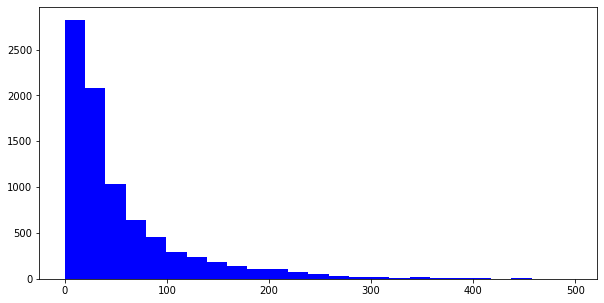

In [ ]:
# train: id, context_id, context_features, tag_id, ent_id, question_id, context, context_token_span, answer_start, answer_end
display(pd.DataFrame({ "context_len":[ len(row[1]) for row in wc_data]
                                  ,"question_len":[ len(row[5]) for row in wc_data]
                                  ,"answer_start":[ row[8] for row in wc_data]
                                  ,"answer_lenght": [ row[9]- row[8]+1 for row in wc_data]
                      }).describe(percentiles=[0.25,0.5,0.75]))
plt.figure( figsize=(10,5))
plt.hist([ row[9] for row in wc_data], 25, facecolor='blue')
plt.show()

,context_len,question_len,answer_start,answer_lenght
count,8360.000000,8360.000000,8360.000000,8360.000000
mean,344.797010,18.791746,60.758254,3.457536
std,165.209351,7.266206,66.908533,2.501750
min,7.000000,3.000000,0.000000,1.000000
25%,186.000000,13.000000,18.000000,1.000000
50%,380.000000,18.000000,37.000000,3.000000
75%,509.000000,23.000000,82.000000,5.000000
max,510.000000,69.000000,469.000000,30.000000


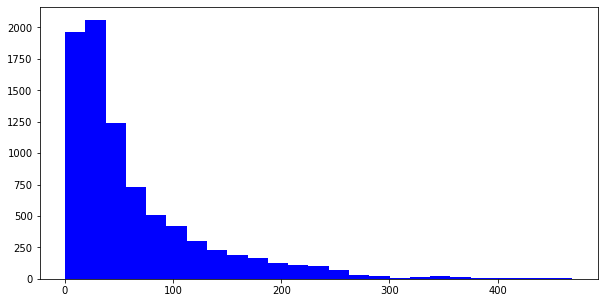

In [ ]:
# train: id, context_id, context_features, tag_id, ent_id, question_id, context, context_token_span, answer_start, answer_end
display(pd.DataFrame({ "context_len":[ len(row[1]) for row in mt5_data]
                                  ,"question_len":[ len(row[5]) for row in mt5_data]
                                  ,"answer_start":[ row[8] for row in mt5_data]
                                  ,"answer_lenght": [ row[9]- row[8]+1 for row in mt5_data]
                      }).describe(percentiles=[0.25,0.5,0.75]))
plt.figure( figsize=(10,5))
plt.hist([ row[9] for row in mt5_data], 25, facecolor='blue')
plt.show()

## Result Wangchan

In [ ]:
from drqa.model import DocReaderModel
from train import BatchGen, load_data, score, _normalize_answer, _f1_score, _exact_match, func_idx2w

In [ ]:
class argumentParser(dict):
  def __init__(self, **kwargs):
    for k in kwargs.keys():
         self.__setattr__(k, kwargs[k])
  

In [ ]:
args_infer = argumentParser(**{'model_file': "/content/drive/MyDrive/Colab Notebooks/BADS9000_IS/thai-DrQA/models/wangchan_id_m510c_e70_bs32_lr001/best_model.pt",
                                'data_file': 'ThaiWikiQA/wangchan_m510c_data_id.pkl',
                               'meta_file': 'ThaiWikiQA/wangchan_1_meta.pkl',
                               'cuda': torch.cuda.is_available(),
                         })

In [ ]:
#Load Checkpoint
if args_infer.cuda:
    print("cuda")
    checkpoint = torch.load(args_infer.model_file)
else:
    print("non cuda")
    checkpoint = torch.load(args_infer.model_file, map_location=lambda storage, loc: storage)

cuda


In [ ]:
state_dict = checkpoint['state_dict']
opt = checkpoint['config']

In [ ]:
train, dev, dev_y, embedding, vocab, opt = load_data(opt)
print(f"Base model {opt['baseModel']}")
print(f"size of train : {len(train)}")
print(f"size of test : {len(dev)}")

Base model wangchan
size of train : 8360
size of test : 929


In [ ]:
model = DocReaderModel(opt, embedding, state_dict)

Some weights of the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased were not used when initializing CamembertModel: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing CamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
batches = BatchGen(dev, batch_size=1, evaluation=True, gpu=args_infer.cuda)

In [ ]:
pred_txt = []
pred_idx = []
for i, batch in enumerate(batches):
  predict = model.predict(batch)
  pred_txt.extend(predict[0])
  pred_idx.extend(func_idx2w( predict[1], model_wc, opt ))
print(f" score from pred_idx : {score(pred_idx, dev_y)}")

 score from pred_idx : (62.002152852529605, 73.22033580995995)


In [ ]:
result = {'id':[], 'ctx':[], 'qnt':[], 'answer':[], 'pred':[], 'em_score':[], 'f1_score':[], 'answer_len':[] }
for i in range(len(pred_txt)):
  result['id'].append(dev[i][0])
  result['ctx'].append("".join([ model_wc.token_decode(j) for j in dev[i][1]]))
  result['qnt'].append("".join([ model_wc.token_decode(j) for j in dev[i][5]]))
  result['answer'].append(dev_y[i][2])
  result['pred'].append(pred_idx[i])
  result['em_score'].append(int(_exact_match(pred_idx[i], dev_y[i])))
  result['f1_score'].append(_f1_score(pred_idx[i], dev_y[i]))
  result['answer_len'].append(len(dev_y[i][2].split()))  

result = pd.DataFrame(result)
print(f"em score : {result['em_score'].mean()*100:0.4f} f1 score {result['f1_score'].mean()*100:0.4f}")
display(result[result.id.isin(["0010039", "0009268","0013410"])])

em score : 62.0022 f1 score 73.2203


,id,ctx,qnt,answer,pred,em_score,f1_score,answer_len
4,0009268,นายกรัฐมนตรีบรูไนนายกรัฐมนตรีบรูไนได้รับการแต่...,นายกรัฐมนตรีบรูไนได้รับการแต่งตั้งโดยบุคคลใด,สุลต่าน บรูไน,สุลต่าน,0,0.666667,2
19,0010039,ด่างทับทิมด่างทับทิมมีชื่อทางเคมีว่าโพแทสเซียม...,โพแทสเซียมเปอร์แมงกาเนตหรือnเป็นชื่อทางเคมีของ...,ด่าง ทับทิม,ด่าง ทับทิม,1,1.000000,2
127,0013410,วัดศรีชุมจังหวัดแพร่วัดศรีชุมเป็นวัดในจังหวัดแ...,วัดศรีชุมตั้งอยู่บนถนนอะไรในจังหวัดแพร่,เจริญ เมือง,คุ้ม เจ้า หลวง,0,0.000000,2


In [ ]:
result.groupby(pd.cut(result.answer_len,[0,1,2,3,4,5,999]).astype(str)).agg({'id':'count', 'em_score':'mean', 'f1_score':'mean'})

,id,em_score,f1_score
answer_len,,,
"(0, 1]",358,0.675978,0.715035
"(1, 2]",219,0.575342,0.694541
"(2, 3]",133,0.639098,0.780198
"(3, 4]",102,0.578431,0.792849
"(4, 5]",64,0.625000,0.794377
"(5, 999]",53,0.452830,0.691562


## Result MT5

In [ ]:
args_mt5 = argumentParser(**{'model_file': "models/mt5_id_m510c_e70_bs32_lr001/best_model.pt",
                                'data_file': 'ThaiWikiQA/mt5_m510c_data_id.pkl',
                               'meta_file': 'ThaiWikiQA/mt5_1_meta.pkl',
                               'cuda': torch.cuda.is_available(),
                         })

In [ ]:
#Load Checkpoint
if args_mt5.cuda:
    print("load model to cuda")
    checkpoint_mt5 = torch.load(args_mt5.model_file)
else:
    print("Load model to cup")
    checkpoint_mt5 = torch.load(args_mt5.model_file, map_location=lambda storage, loc: storage)

state_mt5 = checkpoint_mt5['state_dict']
opt_mt5 = checkpoint_mt5['config']

load model to cuda


In [ ]:
_, mt5_dev_x, mt5_dev_y, mt5_embedding, mt5_vocab, opt_mt5 = load_data(opt_mt5)
print(f"Base model {opt_mt5['baseModel']}")
print(f"size of train : {len(_)}")
print(f"size of test : {len(mt5_dev_x)}")

Base model mt5
size of train : 8360
size of test : 929


In [ ]:
mt5_mcr = DocReaderModel(opt_mt5, mt5_embedding, state_mt5)

Some weights of the model checkpoint at google/mt5-base were not used when initializing MT5EncoderModel: ['decoder.block.8.layer.1.EncDecAttention.k.weight', 'decoder.block.0.layer.0.layer_norm.weight', 'decoder.block.3.layer.0.SelfAttention.k.weight', 'decoder.block.1.layer.1.layer_norm.weight', 'decoder.block.8.layer.2.layer_norm.weight', 'decoder.block.10.layer.0.layer_norm.weight', 'decoder.block.1.layer.2.DenseReluDense.wo.weight', 'decoder.block.4.layer.1.EncDecAttention.k.weight', 'decoder.final_layer_norm.weight', 'decoder.block.2.layer.0.SelfAttention.q.weight', 'decoder.block.11.layer.0.SelfAttention.v.weight', 'decoder.block.6.layer.0.SelfAttention.v.weight', 'decoder.block.7.layer.2.layer_norm.weight', 'decoder.block.1.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.11.layer.2.DenseReluDense.wo.weight', 'decoder.block.10.layer.1.EncDecAttention.o.weight', 'decoder.block.10.layer.2.layer_norm.weight', 'decoder.block.10.layer.0.SelfAttention.q.weight', 'decoder.block.9.la

In [ ]:
mt5_batches = BatchGen(mt5_dev_x, batch_size=1, evaluation=True, gpu=args_mt5.cuda)
pred_txt = []
pred_idx = []
for i, batch in enumerate(mt5_batches):
  predict = mt5_mcr.predict(batch)
  pred_txt.extend(predict[0])
  pred_idx.extend(func_idx2w( predict[1], model_mt5, opt_mt5 ))
print(f" score from pred_idx : {score(pred_idx, mt5_dev_y)}")

 score from pred_idx : (71.04413347685683, 81.61660133713167)


In [ ]:
mt5_result = {'id':[], 'ctx':[], 'qnt':[], 'answer':[], 'pred':[], 'em_score':[], 'f1_score':[], 'answer_len':[] }
for i in range(len(pred_txt)):
  mt5_result['id'].append(mt5_dev_x[i][0])
  mt5_result['ctx'].append("".join([ model_mt5.token_decode(j) for j in mt5_dev_x[i][1]]))
  mt5_result['qnt'].append("".join([ model_mt5.token_decode(j) for j in mt5_dev_x[i][5]]))
  mt5_result['answer'].append(mt5_dev_y[i][2])
  mt5_result['pred'].append(pred_idx[i])
  mt5_result['em_score'].append(int(_exact_match(pred_idx[i], mt5_dev_y[i])))
  mt5_result['f1_score'].append(_f1_score(pred_idx[i], mt5_dev_y[i]))
  mt5_result['answer_len'].append(len(mt5_dev_y[i][2].split()))

mt5_result = pd.DataFrame(mt5_result)
display(mt5_result[mt5_result.id.isin(["0010039", "0009268","0013410"])])
print(f"em score : {mt5_result['em_score'].mean()*100:0.4f} f1 score {mt5_result['f1_score'].mean()*100:0.4f}")

,id,ctx,qnt,answer,pred,em_score,f1_score,answer_len
8,0009268,นายกรัฐมนตรีบรูไนนายกรัฐมนตรีบรูไนได้รับการแต่...,นายกรัฐมนตรีบรูไนได้รับการแต่งตั้งโดยบุคคลใด,สุ ล ต ่า น บ รู ไน,สุ ล ต ่า น,0,0.769231,8
26,0010039,ด่างทับทิมด่างทับทิมมีชื่อทางเคมีว่าโพแทสเซียม...,โพแทสเซียมเปอร์แมงกาเนตหรือKMnOเป็นชื่อทางเคมี...,ด่า ง ทับ ทิ ม,ด่า ง ทับ ทิ ม,1,1.000000,5
145,0013410,วัดศรีชุมจังหวัดแพร่วัดศรีชุมเป็นวัดในจังหวัดแ...,วัดศรีชุมตั้งอยู่บนถนนอะไรในจังหวัดแพร่,เจริญ เมือง,เจริญ เมือง,1,1.000000,2


em score : 71.0441 f1 score 81.6166


In [ ]:
mt5_result.groupby(pd.cut(mt5_result.answer_len,[0,1,2,3,4,5,999]).astype(str)).agg({'id':'count', 'em_score':'mean', 'f1_score':'mean'})

,id,em_score,f1_score
answer_len,,,
"(0, 1]",281,0.850534,0.859075
"(1, 2]",128,0.562500,0.707997
"(2, 3]",142,0.774648,0.851972
"(3, 4]",136,0.654412,0.807357
"(4, 5]",77,0.688312,0.840585
"(5, 999]",165,0.587879,0.792055


In [ ]:
mt5_result[(mt5_result.answer_len ==1) & (mt5_result.em_score != mt5_result.f1_score)]

,id,ctx,qnt,answer,pred,em_score,f1_score,answer_len
28,0008974,เมลวูดเมลวูดเป็นสนามฝึกซ้อมของสโมสรลิเวอร์พูลท...,เมลวูดเป็นสนามฝึกซ้อมของทีมฟุตบอลใด,ลิเวอร์พูล,สโมสร ลิเวอร์พูล,0,0.666667,1
363,0006980,เท้าเท้าเป็นโครงสร้างทางกายวิภาคศาสตร์ของสัตว์...,เอ็นร้อยหวายเป็นเส้นเอ็นที่สําคัญมากของอวัยวะใ...,เท้า,ฝ่า เท้า ฝ่า เท้า,0,0.400000,1
450,0009039,แร็ปมอนสเตอร์คิมนัมจุนอังกฤษKimNamjoonเกาหลีเป...,แร็ปมอนสเตอร์เป็นแร็ปเปอร์และนักแต่งเพลงชาติอะไร,เกาหลี,เกาหลี ใต้,0,0.666667,1
776,0008163,ตลาดตลาดเป็นการชุมนุมกันทางสังคมแลกเปลี่ยนสินค...,คําว่าบาซาร์ในภาษาเปอร์เซียแปลว่าอะไร,ตลาด,ตลาด ตาม ชาว เปอร์ เซีย,0,0.333333,1
804,0009566,คอนเสิร์ตทําโดยคนไทยคอนเสิร์ตทําโดยคนไทยเป็นกา...,คอนเสิร์ตใหญ่ครั้งแรกของวงคาราบาวได้รับการถ่าย...,7,สี กองทัพ บก ช่อง 7,0,0.333333,1


In [ ]:
df.groupby([mt5_result.answer_len,df.City,pd.cut(df.Year,[2006,2011,2016,2020])])[['Value1','Value2']].sum().reset_index()